# 資料準備

In [4]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

In [7]:
from keras.datasets import mnist
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()
print('train data=',len(x_train_image))
print(' test data=',len(x_test_image))

11493376/11490434 [==============================] - 223s   
train data= 60000
 test data= 10000


In [8]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [9]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

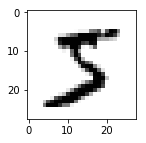

In [10]:
plot_image(x_train_image[0])

In [11]:
y_train_label[0]

5

In [12]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
    prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: 
        num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])

        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

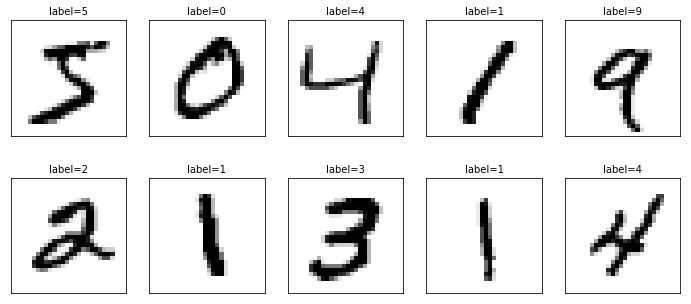

In [13]:
plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)

In [14]:
print ('x_test_image:',x_test_image.shape)
print ('y_test_label:',y_test_label.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


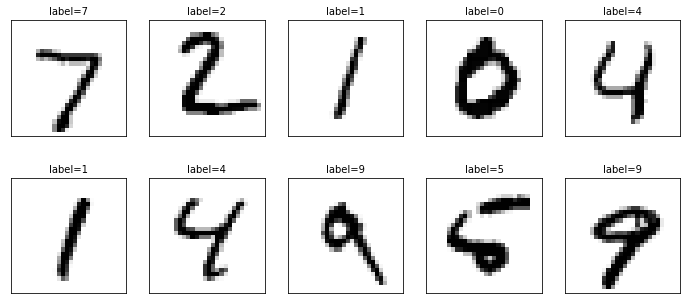

In [15]:
plot_images_labels_prediction(x_test_image,y_test_label,[],0,10)

# 將images進行預處理

In [16]:
print ('x_train_image:',x_train_image.shape)
print ('y_train_label:',y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [17]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

print ('x_train:',x_Train.shape)
print ('x_test:',x_Test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


In [18]:
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [19]:
x_Train_normalize = x_Train/ 255
x_Test_normalize = x_Test/ 255

x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# one hot encode outputs

In [21]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [22]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

# 資料預處理

In [24]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [26]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [27]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2,
                         epochs=10, batch_size=200,verbose=0)

# 以圖形顯示訓練過程

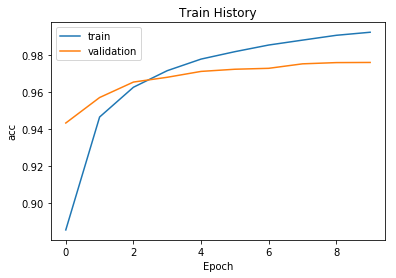

In [29]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
show_train_history(train_history,'acc','val_acc')

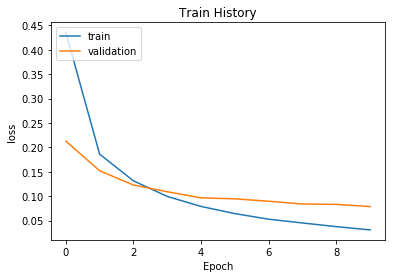

In [30]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [31]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

 9504/10000 [===========================>..] - ETA: 0s
accuracy= 0.9779


# 進行預測

In [32]:
prediction=model.predict_classes(x_Test)

 9984/10000 [============================>.] - ETA: 0s

In [33]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [34]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
    idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0: 
            title+=",predict="+str(prediction[idx])

        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

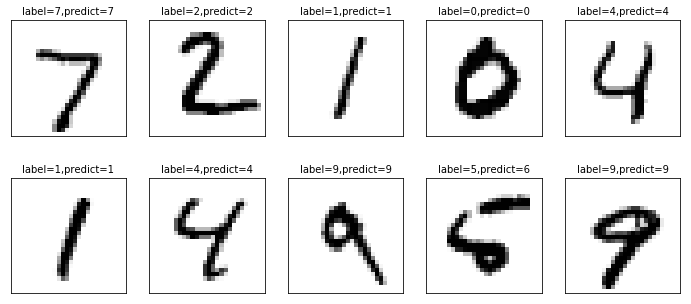

In [35]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# confusion matrix

In [36]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,0,1,3,1,0,0,1,2,0
1,0,1125,3,0,0,1,2,0,4,0
2,5,1,1012,1,1,0,2,3,7,0
3,0,1,3,995,0,1,0,2,3,5
4,1,0,4,0,968,0,1,1,1,6
5,3,0,0,12,1,856,6,1,9,4
6,5,3,2,1,6,3,933,0,5,0
7,1,4,13,5,0,0,0,996,2,7
8,3,0,5,7,2,2,1,2,950,2


In [37]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [38]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
3902,5,3
4300,5,3
4355,5,3
4360,5,3
5937,5,3
5972,5,3


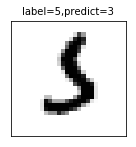

In [39]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

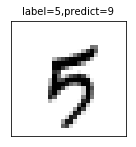

In [41]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=1289,num=1)

# 資料預處理

In [42]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [43]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
#將「輸入層」與「隱藏層」加入模型
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dropout(0.5))
#將「輸出層」加入模型
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [45]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2,
                        epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
9s - loss: 0.3568 - acc: 0.8939 - val_loss: 0.1623 - val_acc: 0.9548
Epoch 2/10
9s - loss: 0.1600 - acc: 0.9534 - val_loss: 0.1172 - val_acc: 0.9655
Epoch 3/10
9s - loss: 0.1165 - acc: 0.9650 - val_loss: 0.0991 - val_acc: 0.9704
Epoch 4/10
9s - loss: 0.0928 - acc: 0.9721 - val_loss: 0.0916 - val_acc: 0.9732
Epoch 5/10
9s - loss: 0.0754 - acc: 0.9778 - val_loss: 0.0824 - val_acc: 0.9752
Epoch 6/10
9s - loss: 0.0622 - acc: 0.9801 - val_loss: 0.0767 - val_acc: 0.9777
Epoch 7/10
9s - loss: 0.0542 - acc: 0.9839 - val_loss: 0.0780 - val_acc: 0.9774
Epoch 8/10
9s - loss: 0.0492 - acc: 0.9854 - val_loss: 0.0740 - val_acc: 0.9781
Epoch 9/10
10s - loss: 0.0436 - acc: 0.9860 - val_loss: 0.0686 - val_acc: 0.9799
Epoch 10/10
10s - loss: 0.0368 - acc: 0.9887 - val_loss: 0.0671 - val_acc: 0.9803


# 以圖形顯示訓練過程

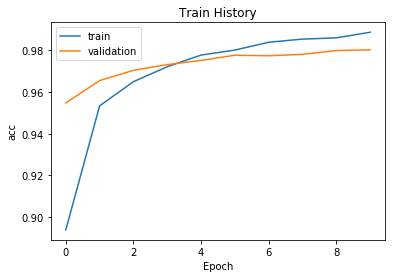

In [46]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(train_history,'acc','val_acc')

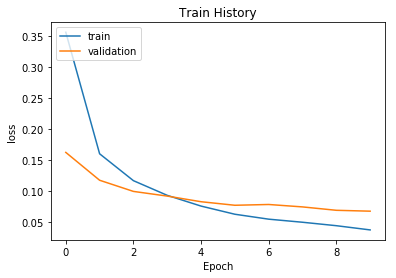

In [47]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [48]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

 9984/10000 [============================>.] - ETA: 0s
accuracy= 0.9811


# 進行預測

In [49]:
prediction=model.predict_classes(x_Test)

 9888/10000 [============================>.] - ETA: 0s

In [50]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [51]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,
    prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: 
        num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

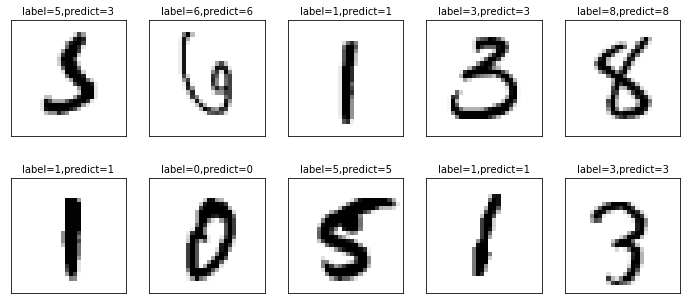

In [52]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340)

# confusion matrix

In [53]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,973,1,1,1,1,0,1,1,1,0
1,0,1126,2,2,0,0,2,0,3,0
2,6,1,1004,3,4,0,2,6,6,0
3,2,0,0,1001,0,1,0,3,3,0
4,1,0,2,0,969,0,2,0,2,6
5,4,0,0,12,2,862,5,1,5,1
6,5,2,0,1,9,3,935,0,3,0
7,2,6,7,2,1,0,0,1002,3,5
8,5,0,1,5,5,1,0,3,952,2


In [54]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [55]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2291,5,3
2597,5,3
2810,5,3
3902,5,3
4271,5,3
4360,5,3


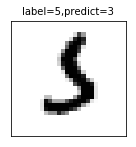

In [56]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=340,num=1)

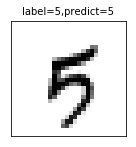

In [57]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=1289,num=1)

# 1. Import Library

In [58]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

# 資料預處理

In [59]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

In [60]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
model = Sequential()
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               225920    
__________

# 訓練模型

In [61]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [62]:
train_history=model.fit(x=x_Train4D_normalize,
                        y=y_TrainOneHot,validation_split=0.2,
                        epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
81s - loss: 0.4873 - acc: 0.8479 - val_loss: 0.0963 - val_acc: 0.9721
Epoch 2/20
76s - loss: 0.1417 - acc: 0.9581 - val_loss: 0.0625 - val_acc: 0.9801
Epoch 3/20
74s - loss: 0.1029 - acc: 0.9690 - val_loss: 0.0511 - val_acc: 0.9846
Epoch 4/20
71s - loss: 0.0846 - acc: 0.9753 - val_loss: 0.0456 - val_acc: 0.9860
Epoch 5/20
66s - loss: 0.0723 - acc: 0.9778 - val_loss: 0.0400 - val_acc: 0.9871
Epoch 6/20
68s - loss: 0.0646 - acc: 0.9805 - val_loss: 0.0396 - val_acc: 0.9882
Epoch 7/20
67s - loss: 0.0570 - acc: 0.9826 - val_loss: 0.0438 - val_acc: 0.9863
Epoch 8/20
66s - loss: 0.0513 - acc: 0.9841 - val_loss: 0.0340 - val_acc: 0.9904
Epoch 9/20
66s - loss: 0.0453 - acc: 0.9865 - val_loss: 0.0334 - val_acc: 0.9898
Epoch 10/20
68s - loss: 0.0433 - acc: 0.9868 - val_loss: 0.0336 - val_acc: 0.9903
Epoch 11/20
68s - loss: 0.0414 - acc: 0.9877 - val_loss: 0.0339 - val_acc: 0.9907
Epoch 12/20
66s - loss: 0.0370 - acc: 0.9882 - val_loss: 

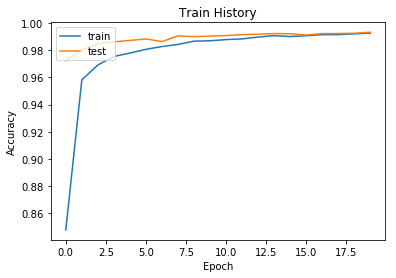

In [63]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
show_train_history('acc','val_acc')

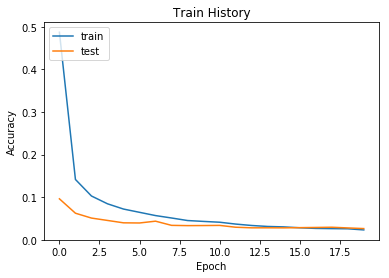

In [64]:
show_train_history('loss','val_loss')

# 評估模型準確率

In [65]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

 9984/10000 [============================>.] - ETA: 0s

0.9941

# 預測結果

In [66]:
prediction=model.predict_classes(x_Test4D_normalize)

10000/10000 [==============================] - 9s     


In [67]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# 查看預測結果

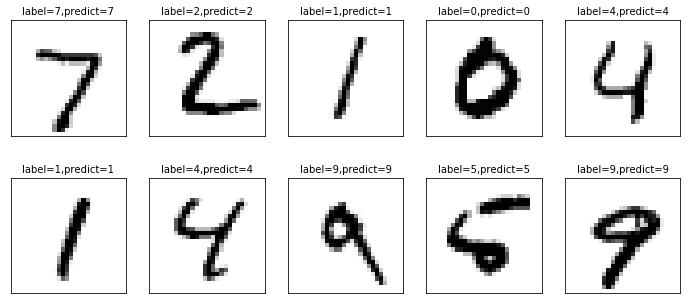

In [69]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        ax.set_title("label=" +str(labels[idx])+",predict="+str(prediction[idx]),fontsize=10)

        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [70]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,0,1,2,0
1,0,1133,1,0,0,1,0,0,0,0
2,1,0,1028,0,0,0,0,2,1,0
3,0,0,0,1004,0,3,0,0,3,0
4,0,0,0,0,977,0,0,0,2,3
5,0,0,0,3,0,887,1,0,0,1
6,3,3,0,0,2,1,948,0,1,0
7,0,3,2,0,0,0,0,1019,1,3
8,1,0,1,0,0,1,0,0,969,2


In [71]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2597,5,3
5937,5,3
